In [1]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

2023-04-26 20:32:46.021239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 20:32:46.506269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

input_shape = (256, 256, 3)
kerSize = 3


In [3]:
model = Sequential([
    # Capas convolucionales
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa de nivelacion
    layers.Flatten(),

    # Capa de conexion total
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

2023-04-26 20:32:46.980208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-26 20:32:46.992445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-26 20:32:46.992574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mean_squared_error'
    )

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/nicko/proyects/dataset/train/outdoor",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/nicko/proyects/dataset/val",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 16884 files belonging to 12 classes.
Using 13508 files for training.
Found 446 files belonging to 1 classes.
Using 89 files for validation.


In [6]:
historial = model.fit(
    train_data, 
    epochs=100, 
    validation_data=val_data
    )

Epoch 1/100


2023-04-26 20:32:48.232710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [13508]
	 [[{{node Placeholder/_4}}]]
2023-04-26 20:32:48.232890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [13508]
	 [[{{node Placeholder/_4}}]]
2023-04-26 20:32:50.024010: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-26 20:32:50.735053: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-26 

423/423 [==============================] - ETA: 0s - loss: 50.9900

2023-04-26 20:33:13.239980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [89]
	 [[{{node Placeholder/_0}}]]
2023-04-26 20:33:13.240272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [89]
	 [[{{node Placeholder/_0}}]]


423/423 [==============================] - 25s 49ms/step - loss: 50.9900 - val_loss: 40.6802
Epoch 2/100
423/423 [==============================] - 21s 49ms/step - loss: 11.5213 - val_loss: 56.0522
Epoch 3/100
423/423 [==============================] - 21s 49ms/step - loss: 10.3990 - val_loss: 40.2377
Epoch 4/100
423/423 [==============================] - 21s 48ms/step - loss: 9.3427 - val_loss: 40.4187
Epoch 5/100
423/423 [==============================] - 21s 48ms/step - loss: 8.5342 - val_loss: 37.0928
Epoch 6/100
423/423 [==============================] - 21s 49ms/step - loss: 7.7719 - val_loss: 31.1209
Epoch 7/100
423/423 [==============================] - 21s 48ms/step - loss: 7.3679 - val_loss: 40.8127
Epoch 8/100
423/423 [==============================] - 21s 48ms/step - loss: 6.7015 - val_loss: 29.6238
Epoch 9/100
423/423 [==============================] - 21s 49ms/step - loss: 6.2316 - val_loss: 22.9781
Epoch 10/100
423/423 [==============================] - 21s 48ms/step - l

# Comportamiento de la perdida

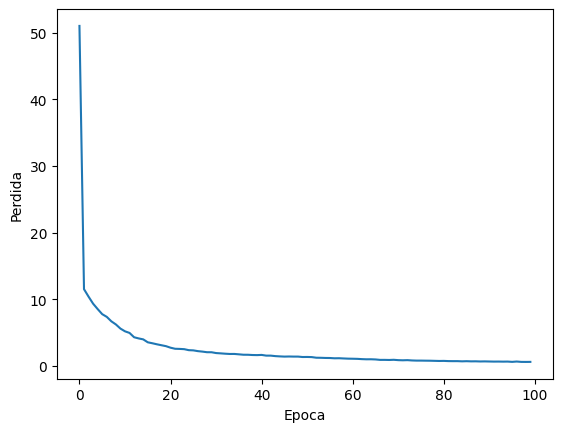

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])

In [8]:
import numpy as np
from PIL import Image

# cargar la imagen
image = Image.open("/home/nicko/proyects/dataset/val/outdoor/scene_00022/scan_00193/00022_00193_outdoor_000_020.png")
image = np.array(image)
image = tf.image.resize(image, (256, 256))
image = np.expand_dims(image, axis=0)

# realizar la prediccion
prediction = model.predict(image)

# Print the predicted depth value
print("Predicted depth value:", prediction[0][0])

1/1 [==============================] - 0s 83ms/step
Predicted depth value: 3.1083724


In [9]:
model.save('model_entrenado.h5')

In [10]:
# Convertir el modelo a TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TFLite en un archivo
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)

2023-04-26 21:08:20.246302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-26 21:08:20.253358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-04-26 21:08:20.451857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-26 21:08

INFO:tensorflow:Assets written to: /tmp/tmp3nndn5o3/assets


INFO:tensorflow:Assets written to: /tmp/tmp3nndn5o3/assets
2023-04-26 21:08:21.594161: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-04-26 21:08:21.594179: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-04-26 21:08:21.594560: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp3nndn5o3
2023-04-26 21:08:21.595717: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-26 21:08:21.595724: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp3nndn5o3
2023-04-26 21:08:21.598939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-04-26 21:08:21.599981: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-04-26 21:08:21.681255: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio


# tflite running


In [14]:
import tensorflow as tf
import numpy as np
from PIL import Image

# load the model
interpreter = tf.lite.Interpreter(model_path="/home/nicko/proyects/monocular-depth-estimation-using-tensorflow/my_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image = Image.open("/home/nicko/proyects/dataset/val/outdoor/scene_00022/scan_00193/00022_00193_outdoor_000_020.png")
image = image.resize((256,256))
image = np.array(image, dtype=np.float32)
image = np.expand_dims(image, axis=0)

interpreter.set_tensor(input_details[0]['index'], image)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[3.552549]]


# ------------------------------------------------------------------------------